In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

In [5]:
import pandas as pd

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv(r"/content/Mall_Customers.csv")

In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
#Handle missing values and duplicates.


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [10]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
print(df.duplicated().sum())

0


In [12]:
df=df.drop_duplicates()

In [13]:
#Perform an initial EDA to understand the features and relationships.

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

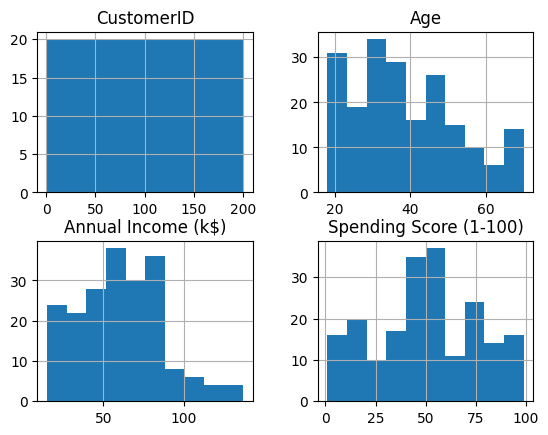

In [14]:
df.hist()

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

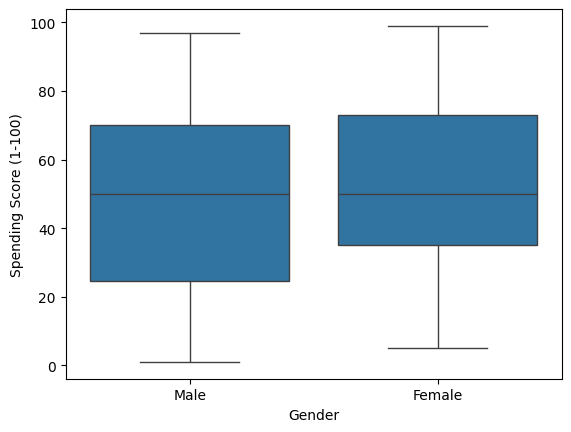

In [15]:
sns.boxplot(x="Gender", y="Spending Score (1-100)",data=df)

In [28]:
#Scale numerical features using StandardScaler.

In [16]:
pip install scikit-learn

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
numericals=df.select_dtypes(include=['int64','float64']).columns
print(numericals)

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [19]:
scaler=StandardScaler()
df[numericals]=scaler.fit_transform(df[numericals])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,Male,-1.424569,-1.738999,-0.434801
1,-1.706091,Male,-1.281035,-1.738999,1.195704
2,-1.688771,Female,-1.352802,-1.700830,-1.715913
3,-1.671450,Female,-1.137502,-1.700830,1.040418
4,-1.654129,Female,-0.563369,-1.662660,-0.395980


In [34]:
#Encode categorical features using One-Hot Encoding.

In [21]:
categories=df.select_dtypes(include=["object"]).columns
print(categories)

Index(['Gender'], dtype='object')


In [22]:
df_encoded = pd.get_dummies(df, columns=categories, drop_first=True)
print(df_encoded.head())


   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0   -1.723412 -1.424569           -1.738999               -0.434801   
1   -1.706091 -1.281035           -1.738999                1.195704   
2   -1.688771 -1.352802           -1.700830               -1.715913   
3   -1.671450 -1.137502           -1.700830                1.040418   
4   -1.654129 -0.563369           -1.662660               -0.395980   

   Gender_Male  
0         True  
1         True  
2        False  
3        False  
4        False  


In [23]:
#Create new features like total spending per customer if applicable.

In [24]:
df["Total Spending (k$)"] = df["Annual Income (k$)"] * (df["Spending Score (1-100)"] / 100)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Total Spending (k$)
0,-1.723412,Male,-1.424569,-1.738999,-0.434801,0.007561
1,-1.706091,Male,-1.281035,-1.738999,1.195704,-0.020793
2,-1.688771,Female,-1.352802,-1.700830,-1.715913,0.029185
3,-1.671450,Female,-1.137502,-1.700830,1.040418,-0.017696
4,-1.654129,Female,-0.563369,-1.662660,-0.395980,0.006584
...,...,...,...,...,...,...
195,1.654129,Female,-0.276302,2.268791,1.118061,0.025366
196,1.671450,Female,0.441365,2.497807,-0.861839,-0.021527
197,1.688771,Male,-0.491602,2.497807,0.923953,0.023079
198,1.706091,Male,-0.491602,2.917671,-1.250054,-0.036472


In [25]:
#Apply K-Means clustering to group customers into clusters.

In [27]:
from sklearn.cluster import KMeans


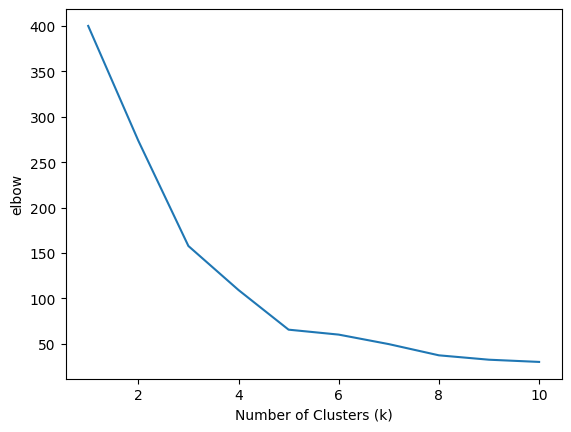

In [32]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
elbow = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

plt.plot(range(1, 11), elbow)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("elbow")
plt.show()


In [65]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df["Cluster"] = kmeans.fit_predict(X)
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Total Spending (k$),Cluster
0,-1.723412,Male,-1.424569,-1.738999,-0.434801,0.007561,4
1,-1.706091,Male,-1.281035,-1.738999,1.195704,-0.020793,2
2,-1.688771,Female,-1.352802,-1.700830,-1.715913,0.029185,4
3,-1.671450,Female,-1.137502,-1.700830,1.040418,-0.017696,2
4,-1.654129,Female,-0.563369,-1.662660,-0.395980,0.006584,4
...,...,...,...,...,...,...,...
195,1.654129,Female,-0.276302,2.268791,1.118061,0.025366,1
196,1.671450,Female,0.441365,2.497807,-0.861839,-0.021527,3
197,1.688771,Male,-0.491602,2.497807,0.923953,0.023079,1
198,1.706091,Male,-0.491602,2.917671,-1.250054,-0.036472,3


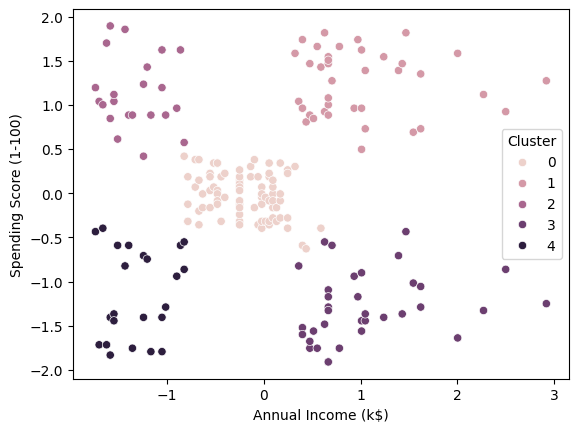

In [66]:
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
                hue=df["Cluster"])
plt.show()

In [36]:
#Visualize the clusters in a 2D plot using PCA to reduce dimensions.

In [38]:
from sklearn.decomposition import PCA


In [67]:
Xpca=PCA(n_components=2).fit_transform(X)
dfpca = pd.DataFrame(Xpca, columns=["PCA1", "PCA2"])
dfpca["Cluster"] = df["Cluster"]

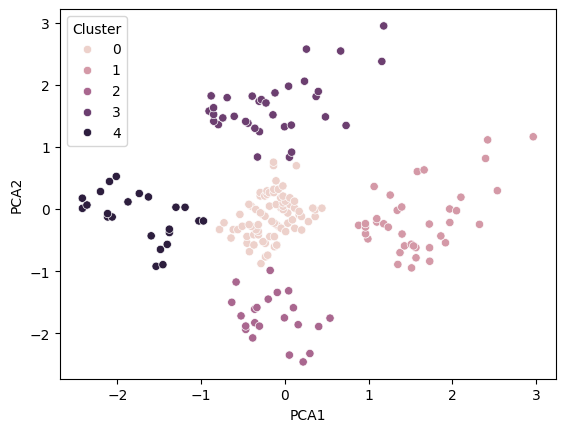

In [68]:
sns.scatterplot(x=dfpca["PCA1"], y=dfpca["PCA2"], hue=dfpca["Cluster"])
plt.show()

In [42]:
#Evaluate the clustering performance by calculating Silhouette Score.

In [62]:
from sklearn.metrics import silhouette_score


In [69]:
silhouette = silhouette_score(X, df["Cluster"])


In [70]:
print(silhouette)

0.5546571631111091


In [71]:
#Plot the clusters and label them by features like spending habits.

In [73]:
clusterlabels = {
    0: "Careful Spenders",
    1: "High Rollers",
    2: "Frugal Customers",
    3: "Impulsive Shoppers",
    4: "Average Customers"
}

df["Cluster Label"] = df["Cluster"].map(clusterlabels)

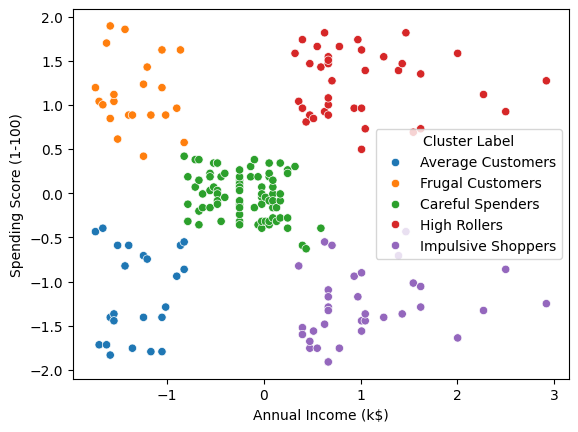

In [74]:
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
                hue=df["Cluster Label"])
plt.show()


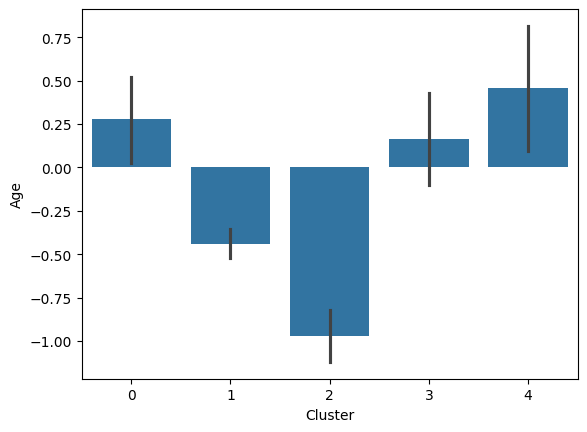

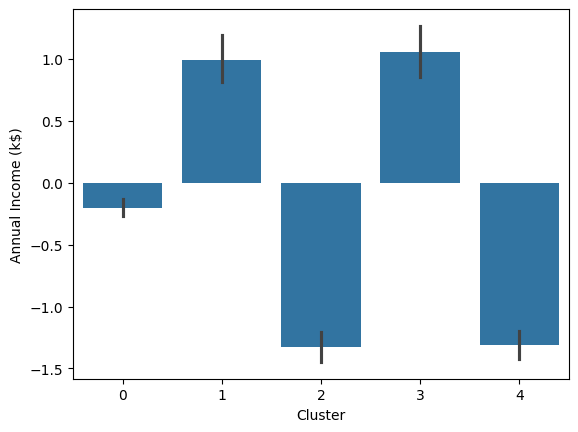

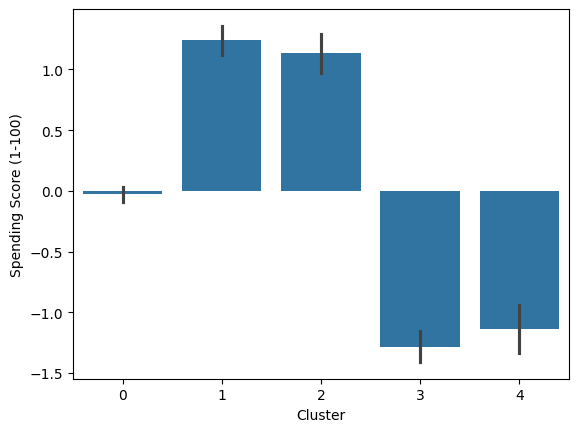

In [87]:
def plotss(i):
  sns.barplot(x=df["Cluster"], y=df[i])
  plt.show()
plotss("Age")
plotss("Annual Income (k$)")
plotss("Spending Score (1-100)")
